In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Create or connect to a SQLite database
connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()
cursor.execute('pragma foreign_keys = on')

In [16]:
cursor.execute('''
create table if not exists students (
    student_id integer primary key autoincrement,
    first_name text,
    last_name text
)
''')

cursor.execute('''
create table if not exists grades (
    grade_id integer primary key autoincrement,
    student_id integer,
    subject text,
    grade integer
)
''')

In [17]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
insert into students (first_name, last_name) values (?, ?)
''', students_data)

connection.commit()

In [18]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 91),
    (3, 'English', 92),
    (3, 'History', 93),
    (4, 'Math', 83),
    (4, 'English', 86),
    (4, 'History', 89),
    (5, 'Math', 90),
    (5, 'English', 79),
    (5, 'History', 99)
]

cursor.executemany('''
insert into grades (student_id, subject, grade) values (?, ?, ?)
''', grades_data)

connection.commit()

In [19]:
cursor.execute('select first_name, last_name, grade from students join grades on students.student_id = grades.student_id')
results = cursor.fetchall()
for i in range(len(results)):
    print(f"Student: {results[i][0]} {results[i][1]} - Grade: {results[i][2]}")

Student: Alice Johnson - Grade: 95
Student: Alice Johnson - Grade: 88
Student: Alice Johnson - Grade: 90
Student: Bob Smith - Grade: 82
Student: Bob Smith - Grade: 76
Student: Bob Smith - Grade: 85
Student: Carol White - Grade: 91
Student: Carol White - Grade: 92
Student: Carol White - Grade: 93
Student: David Brown - Grade: 83
Student: David Brown - Grade: 86
Student: David Brown - Grade: 89
Student: Eve Davis - Grade: 90
Student: Eve Davis - Grade: 79
Student: Eve Davis - Grade: 99


In [20]:
cursor.execute('select first_name, last_name, avg(grade) from grades join students on grades.student_id = students.student_id group by grades.student_id')
results = cursor.fetchall()
for i in range(len(results)):
    print(f"Student: {results[i][0]} {results[i][1]} - Avg Grade: {results[i][2]}")

Student: Alice Johnson - Avg Grade: 91.0
Student: Bob Smith - Avg Grade: 81.0
Student: Carol White - Avg Grade: 92.0
Student: David Brown - Avg Grade: 86.0
Student: Eve Davis - Avg Grade: 89.33333333333333


In [80]:
cursor.execute('select first_name, last_name, avg(grade) as avgGrade from grades join students on grades.student_id = students.student_id group by first_name order by avgGrade desc limit 1')
results = cursor.fetchall()
print(f"Student: {results[0][0]} {results[0][1]} - Grade: {results[0][2]}")

Student: Carol White - Grade: 92.0


In [22]:
cursor.execute("select avg(grade) from grades where subject = 'Math'")
results = cursor.fetchall()
print(f"Average grade (math): {results[0][0]}")

Average grade (math): 88.2


In [23]:
cursor.execute('select distinct first_name, last_name from students join grades on students.student_id = grades.student_id where grade > 90')
results = cursor.fetchall()
for i in range(len(results)):
    print(f"Student: {results[i][0]} {results[i][1]}")

Student: Alice Johnson
Student: Carol White
Student: Eve Davis


In [24]:
students_df = pd.read_sql_query('select * from students', connection)
students_df.head()
grades_df = pd.read_sql_query('select * from grades', connection)
grades_df.head()

   student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     91
7          8           3  English     92
8          9           3  History     93
9         10           4     Math     83
10        11           4  English     86
11        12           4  History     89
12        13           5     Math     90
13        14           5  English     79
14        15           5  History     99


In [26]:
df = students_df.join(grades_df.set_index('student_id'), on='student_id')
df.head(10)

,student_id,first_name,last_name,grade_id,subject,grade
0,1,Alice,Johnson,1,Math,95
0,1,Alice,Johnson,2,English,88
0,1,Alice,Johnson,3,History,90
1,2,Bob,Smith,4,Math,82
1,2,Bob,Smith,5,English,76
1,2,Bob,Smith,6,History,85
2,3,Carol,White,7,Math,91
2,3,Carol,White,8,English,92
2,3,Carol,White,9,History,93
3,4,David,Brown,10,Math,83


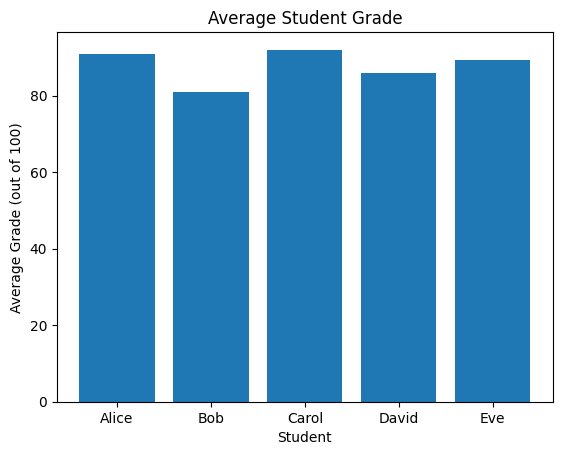

In [82]:
student_avg = df.groupby(['student_id'], as_index = False)['grade'].mean()
student_avg.head()

fig, ax = plt.subplots()

ax.bar(['Alice', 'Bob', 'Carol', 'David', 'Eve'], student_avg['grade'])
ax.set_ylabel('Average Grade (out of 100)')
ax.set_xlabel('Student')
ax.set_title('Average Student Grade')

plt.show()

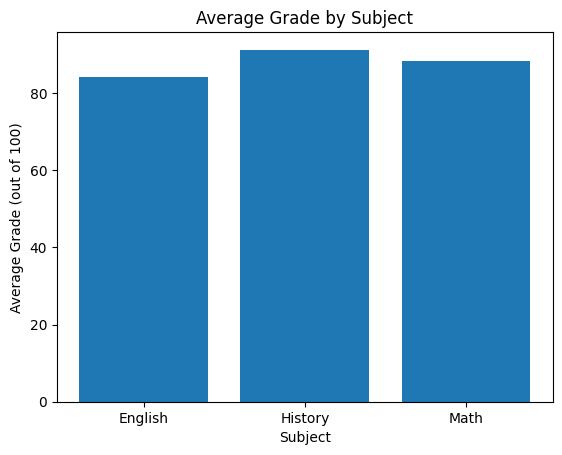

In [67]:
subject_avg = df.groupby(['subject'], as_index = False)['grade'].mean()

fig, ax = plt.subplots()

ax.bar(subject_avg['subject'], subject_avg['grade'])
ax.set_ylabel('Average Grade (out of 100)')
ax.set_xlabel('Subject')
ax.set_title('Average Grade by Subject')

plt.show()